**Xây dựng toạ độ thực tế của các phương tiện trên mặt phẳng**

Kích thước frame: 1280x590


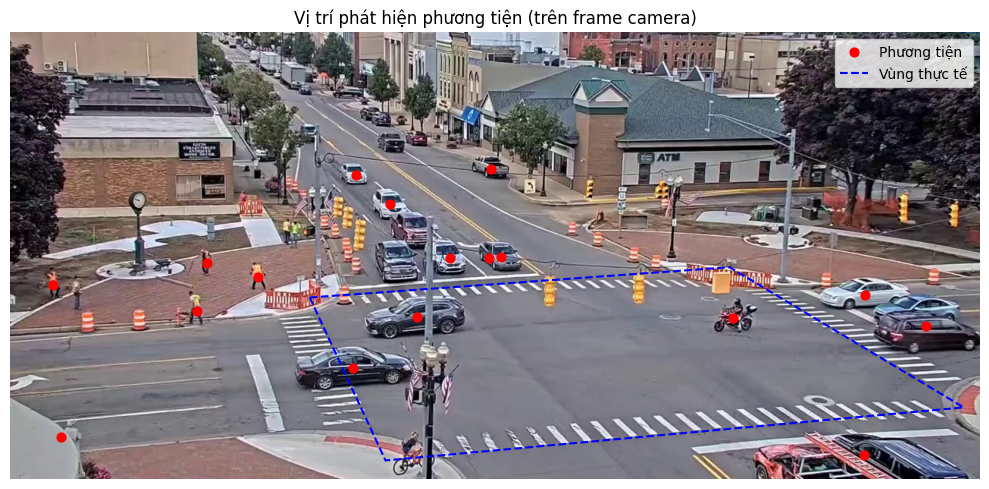

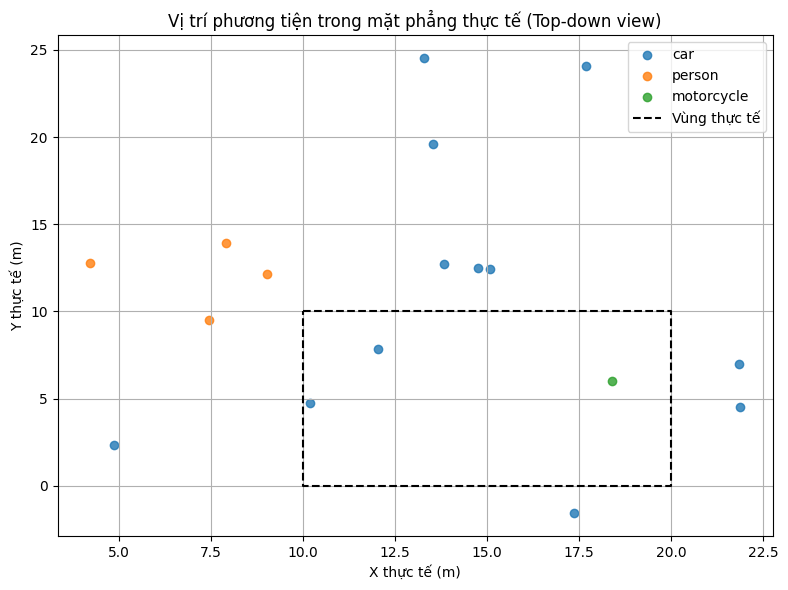

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================================
# 1️⃣ Đọc ảnh frame thực tế
# ==========================================================
frame_path = "frames/frame_1.jpg"
frame = cv2.imread(frame_path)

if frame is None:
    raise FileNotFoundError(f"Không tìm thấy ảnh: {frame_path}")

# Chuyển sang RGB để hiển thị đúng màu trong matplotlib
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
h, w, _ = frame.shape
print(f"Kích thước frame: {w}x{h}")

# ==========================================================
# 2️⃣ Định nghĩa 4 điểm vùng mặt phẳng thực tế trong frame
# ==========================================================
# (4 điểm bạn đã xác định trong ảnh)
pts_image = np.float32([
    [395, 350], [949, 310], [495, 565], [1258, 495]
])

# ==========================================================
# 3️⃣ Định nghĩa kích thước thật (mặt phẳng thực tế)
# ==========================================================
# Ví dụ vùng này ngoài đời thực là hình chữ nhật 10m x 20m
pts_real = np.float32([
    [10, 10],      # top-left
    [20, 10],     # top-right
    [10, 0],     # bottom-left
    [20, 0],     # bottom-right
])

# Tính ma trận biến đổi
M = cv2.getPerspectiveTransform(pts_image, pts_real)

# ==========================================================
# 4️⃣ Đọc dữ liệu YOLO detected
# ==========================================================
df = pd.read_csv("vehicle_boxes.csv")

# Lấy toạ độ trung tâm
points = df[['center_x', 'center_y']].values.astype(np.float32)
points = np.array([points])

# Biến đổi sang toạ độ thực tế
transformed = cv2.perspectiveTransform(points, M)[0]
df['X_real'] = transformed[:, 0]
df['Y_real'] = transformed[:, 1]

# ==========================================================
# 5️⃣ Vẽ biểu đồ scatter trên frame gốc (camera view)
# ==========================================================
plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.scatter(df['center_x'], df['center_y'], c='red', s=40, label='Phương tiện')
plt.plot(
    [pts_image[0][0], pts_image[1][0], pts_image[3][0], pts_image[2][0], pts_image[0][0]],
    [pts_image[0][1], pts_image[1][1], pts_image[3][1], pts_image[2][1], pts_image[0][1]],
    'b--', label='Vùng thực tế'
)
plt.title("Vị trí phát hiện phương tiện (trên frame camera)")
plt.legend()
plt.axis('off')
plt.tight_layout()
plt.show()

# ==========================================================
# 6️⃣ Vẽ biểu đồ top-down (tọa độ thực tế)
# ==========================================================
plt.figure(figsize=(8, 6))
for cls in df['class'].unique():
    subset = df[df['class'] == cls]
    plt.scatter(subset['X_real'], subset['Y_real'], label=cls, alpha=0.8)

# Tô lại đường biên vùng thực tế
plt.plot(
    [pts_real[0][0], pts_real[1][0], pts_real[3][0], pts_real[2][0], pts_real[0][0]],
    [pts_real[0][1], pts_real[1][1], pts_real[3][1], pts_real[2][1], pts_real[0][1]],
    'k--', label='Vùng thực tế'
)

plt.xlabel("X thực tế (m)")
plt.ylabel("Y thực tế (m)")
plt.title("Vị trí phương tiện trong mặt phẳng thực tế (Top-down view)")
plt.legend()
# plt.gca().invert_yaxis()  # đảo trục Y cho cùng hướng với camera
plt.grid(True)
plt.tight_layout()
plt.show()



image 1/1 d:\Documents\HK2025\project3\traaaa\weekly_report\week3_4\frames_2\frame_1.jpg: 384x640 17 cars, 1 motorcycle, 96.2ms
Speed: 4.4ms preprocess, 96.2ms inference, 17.4ms postprocess per image at shape (1, 3, 384, 640)


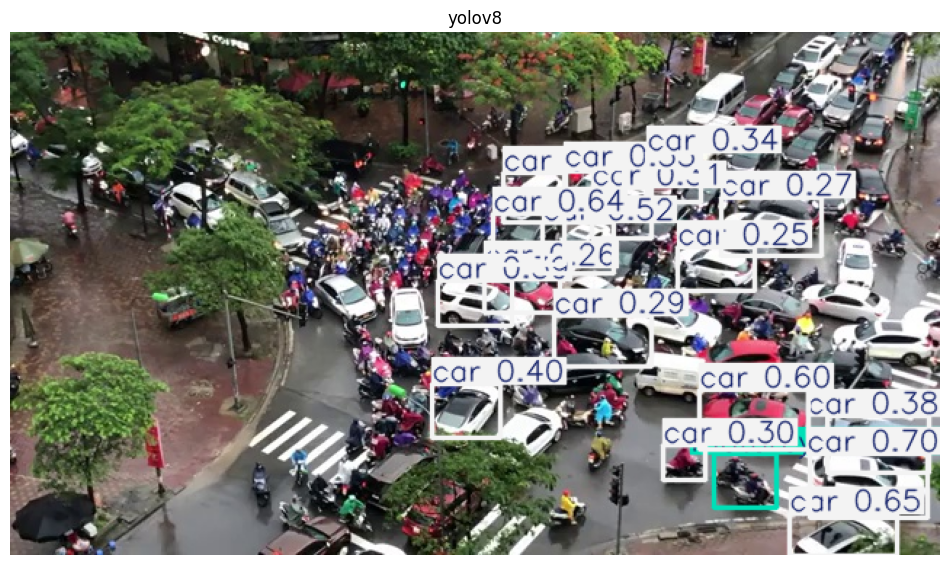

In [1]:
from ultralytics import YOLO
import cv2
import pandas as pd
import matplotlib.pyplot as plt

model = YOLO('./yolov8n.pt') 
frame_path = "./frames_2/frame_1.jpg"
results = model(frame_path)

# results[0].show()  

result = results[0]
annotated_img = result.plot()  
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("yolov8")
plt.show()


In [ ]:
import requests
import cv2
import numpy as np
import time
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

url = "https://giaothong.hochiminhcity.gov.vn:8007/Render/CameraHandler.ashx?id=587ee2aeb807da0011e33d52&bg=black&w=400&h=260&t=1761137079079"

cookie_str = """ASP.NET_SessionId=2pd400jxoiokdowndnju2zdr; .VDMS=E6D97CFABE16A23E4774230850C06957F36B5B3EA1FF8360A13AFBE6CB680692EF54AF6792F4900295E280829B09309FC1C42F3998D647739B7CDA12A3BBEC339828A6DCD87CE1E69EDE5FED4D54D3E641C6DE126BC213E650AF93CA7D237E3F0BBF1FF20C50762E6AE7BB049B7EE780F66A625A; _frontend=!DXIcY2WO+fUXfJrZrha5HPS1wJuimy99qr25sd/0cSvsQGa2NxADtaW2cwiwYrp8paE1JECWJWCs904=; CurrentLanguage=vi; _ga=GA1.3.4923489.1760691959; _gid=GA1.3.274225042.1760691959; _pk_id.1.2f14=7192ec68653c6b65.1760691959.1.1760691959.1760691959.; _pk_ses.1.2f14=*; _ga_JCXT8BPG4E=GS2.3.s1760691960$o1$g0$t1760691960$j60$l0$h0; TS01e7700a=0150c7cfd1dc293c4c03a2ac85fec94a52acc6f241c039622d7f59470ce112b88ed79d54a48de2bf7d912f31e100bf2d5ad97a2cb8a0be33f0f7e148086b7a1d1cf1550652ae0a33c727506fdea7d7a8d673254c321f8ba65848425d90a7cb03f63360c739"""

def parse_cookie_string(s):
    return dict(part.split("=", 1) for part in s.split("; ") if "=" in part)

cookies = parse_cookie_string(cookie_str)

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36",
    "Accept": "image/webp,image/apng,image/*,*/*;q=0.8",
    "Accept-Language": "vi,en;q=0.9",
    "Referer": "https://giaothong.hochiminhcity.gov.vn/",
    "Sec-CH-UA": '"Google Chrome";v="141", "Not?A_Brand";v="8", "Chromium";v="141"',
    "Sec-CH-UA-Platform": '"Windows"',
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Upgrade-Insecure-Requests": "1",
}

session = requests.Session()
session.headers.update(headers)
session.cookies.update(cookies)

while True:
    r = session.get(url, timeout=10, verify=False)
    if r.status_code == 200 and r.content[:4] != b"<!DO":
        img = np.frombuffer(r.content, np.uint8)
        frame = cv2.imdecode(img, cv2.IMREAD_COLOR)
        if frame is not None:
            ts = datetime.now().strftime("%Y%m%d_%H%M%S")
            cv2.imwrite(f"frames/{ts}.jpg", frame)
            print(f"✅ Saved {ts}.jpg {frame.shape}")
        else:
            print("⚠️ Dữ liệu không decode được.")
    else:
        print(f"⚠️ HTTP {r.status_code}")
    time.sleep(15)


✅ Saved 20251030_074741.jpg (266, 406, 3)
✅ Saved 20251030_074756.jpg (266, 406, 3)
✅ Saved 20251030_074812.jpg (266, 406, 3)
✅ Saved 20251030_074827.jpg (266, 406, 3)
✅ Saved 20251030_074842.jpg (266, 406, 3)
✅ Saved 20251030_074858.jpg (266, 406, 3)
✅ Saved 20251030_074913.jpg (266, 406, 3)
✅ Saved 20251030_074928.jpg (266, 406, 3)
✅ Saved 20251030_074944.jpg (266, 406, 3)
✅ Saved 20251030_074959.jpg (266, 406, 3)
✅ Saved 20251030_075015.jpg (266, 406, 3)
✅ Saved 20251030_075030.jpg (266, 406, 3)
✅ Saved 20251030_075046.jpg (266, 406, 3)
✅ Saved 20251030_075101.jpg (266, 406, 3)
✅ Saved 20251030_075117.jpg (266, 406, 3)
✅ Saved 20251030_075132.jpg (266, 406, 3)
✅ Saved 20251030_075148.jpg (266, 406, 3)


KeyboardInterrupt: 

Xác định mức độ hỗn loạn
đầu vào: mảng vector phương tiện các phương tiện

- độ tập trung hướng: -> chaos_angle | lượng phân bố theo góc của các vector
    - (0-1): Hỗn loạn cao - Hỗn loạn thấp (1 - tập trung hướng lớn)
- mức đa hướng:  
    - chia vùng roi thành các không gian, tính entropy đa hướng
- chia theo vùng con: tính phân bố theo cục bộ các vùng con trong ROI
    - thành lưới 2x2 (4x4) -> tính mức độ tập trung hướng các phương tiện theo vùng


In [ ]:
import math
# from collections import Counter
from itertools import combinations

import numpy as np

# Input:
# vectors: list of tuples (start_x, start_y, end_x, end_y)
# roi_bbox: (xmin, ymin, xmax, ymax) optional for grid-based local mixture
# All coordinates in same unit.

def compute_angles_and_lengths(vectors):
    angles = []
    lengths = []
    midpoints = []
    segments = []
    for sx, sy, ex, ey in vectors:
        dx = ex - sx
        dy = ey - sy
        angle = math.atan2(dy, dx) % (2 * math.pi)
        length = math.hypot(dx, dy)
        angles.append(angle)
        lengths.append(length)
        midpoints.append(((sx + ex) / 2.0, (sy + ey) / 2.0))
        segments.append(((sx, sy), (ex, ey)))
    return np.array(angles), np.array(lengths), midpoints, segments

def mean_resultant_length(angles):
    c = np.cos(angles).sum()
    s = np.sin(angles).sum()
    R = math.hypot(c, s) / len(angles) if len(angles) > 0 else 0.0
    return R

def angular_entropy(angles, k_bins=12):
    if len(angles) == 0:
        return 0.0
    bins = np.linspace(0.0, 2 * math.pi, k_bins + 1)
    counts, _ = np.histogram(angles, bins=bins)
    probs = counts.astype(float) / counts.sum()
    probs = probs[probs > 0]
    H = -np.sum(probs * np.log(probs))
    H_norm = H / math.log(k_bins)
    return H_norm

def grid_local_mixture(angles, midpoints, counts_lengths, roi_bbox, grid_size=4, k_bins=8):
    if roi_bbox is None or len(angles) == 0:
        return 0.0
    xmin, ymin, xmax, ymax = roi_bbox
    gx = grid_size
    gy = grid_size
    cell_scores = []
    weights = []
    for ix in range(gx):
        for iy in range(gy):
            x0 = xmin + (xmax - xmin) * ix / gx
            x1 = xmin + (xmax - xmin) * (ix + 1) / gx
            y0 = ymin + (ymax - ymin) * iy / gy
            y1 = ymin + (ymax - ymin) * (iy + 1) / gy
            idxs = []
            for i, (mx, my) in enumerate(midpoints):
                if x0 <= mx < x1 and y0 <= my < y1:
                    idxs.append(i)
            if not idxs:
                continue
            sub_angles = angles[idxs]
            sub_w = np.sum(counts_lengths[idxs])
            R_cell = mean_resultant_length(sub_angles)
            score_cell = 1.0 - R_cell
            cell_scores.append(score_cell * sub_w)
            weights.append(sub_w)
    if not weights:
        return 0.0
    return float(sum(cell_scores) / sum(weights))

def angle_diff(a, b):
    d = abs(a - b) % (2 * math.pi)
    if d > math.pi:
        d = 2 * math.pi - d
    return d

def seg_segment_min_dist(a1, a2, b1, b2):
    # Compute min distance between two line segments in 2D
    # Helper functions
    def dot(u, v):
        return u[0] * v[0] + u[1] * v[1]
    def norm2(u):
        return u[0] * u[0] + u[1] * u[1]
    def sub(u, v):
        return (u[0] - v[0], u[1] - v[1])
    def clamp(x, a, b):
        return max(a, min(b, x))
    u = sub(a2, a1)
    v = sub(b2, b1)
    w = sub(a1, b1)
    a = norm2(u)
    b = dot(u, v)
    c = norm2(v)
    d = dot(u, w)
    e = dot(v, w)
    D = a * c - b * b
    sc, sN, sD = 0.0, D, D
    tc, tN, tD = 0.0, D, D
    SMALL = 1e-9
    if D < SMALL:
        sN = 0.0
        sD = 1.0
        tN = e
        tD = c
    else:
        sN = (b * e - c * d)
        tN = (a * e - b * d)
        if sN < 0:
            sN = 0
            tN = e
            tD = c
        elif sN > sD:
            sN = sD
            tN = e + b
            tD = c
    if tN < 0:
        tN = 0
        if -d < 0:
            sN = 0
        elif -d > a:
            sN = sD
        else:
            sN = -d
            sD = a
    elif tN > tD:
        tN = tD
        if (-d + b) < 0:
            sN = 0
        elif (-d + b) > a:
            sN = sD
        else:
            sN = (-d + b)
            sD = a
    sc = 0.0 if abs(sN) < SMALL else sN / sD
    tc = 0.0 if abs(tN) < SMALL else tN / tD
    dP = (w[0] + sc * u[0] - tc * v[0], w[1] + sc * u[1] - tc * v[1])
    return math.hypot(dP[0], dP[1])

def pairwise_conflict_index(angles, lengths, segments, sigma=5.0):
    n = len(angles)
    if n < 2:
        return 0.0
    total = 0.0
    for i, j in combinations(range(n), 2):
        dtheta = angle_diff(angles[i], angles[j])
        f_dir = (1.0 - math.cos(dtheta)) / 2.0
        d_ij = seg_segment_min_dist(segments[i][0], segments[i][1], segments[j][0], segments[j][1])
        prox = math.exp(-d_ij / sigma)
        contrib = lengths[i] * lengths[j] * f_dir * prox
        total += contrib
    # Normalization: divide by sum(lengths)^2 / 2 as a rough upper bound
    denom = (lengths.sum() ** 2) / 2.0
    if denom <= 0:
        return 0.0
    return float(total / denom)

def compute_chaos_score(vectors, roi_bbox=None,
                        angle_bins=16, grid_size=4, sigma=5.0,
                        weights=(0.25, 0.20, 0.25, 0.30)):
    angles, lengths, midpoints, segments = compute_angles_and_lengths(vectors)
    if len(angles) == 0:
        return {
            "final_score": 0.0,
            "chaos_angle": 0.0,
            "entropy_index": 0.0,
            "local_mixture": 0.0,
            "conflict_index": 0.0
        }
    R = mean_resultant_length(angles)
    chaos_angle = 1.0 - R
    entropy_index = angular_entropy(angles, k_bins=angle_bins)
    counts_lengths = lengths  # Could use ones or lengths as weights per-vehicle
    local_mixture = grid_local_mixture(angles, midpoints, counts_lengths, roi_bbox, grid_size=grid_size, k_bins=angle_bins)
    conflict_index = pairwise_conflict_index(angles, lengths, segments, sigma=sigma)
    a, b, c, d = weights
    final = a * chaos_angle + b * entropy_index + c * local_mixture + d * conflict_index
    final = max(0.0, min(1.0, final))
    return {
        "final_score": final,
        "chaos_angle": chaos_angle,
        "entropy_index": entropy_index,
        "local_mixture": local_mixture,
        "conflict_index": conflict_index
    }

if __name__ == "__main__":
    # Example vectors: [(sx,sy,ex,ey), ...]
    vecs = [
        (10, 90, 10, 70),
        (20, 90, 20, 67),
        (30, 90, 30, 70),
        # (30, 92, 30, 72),
        # (50, 88, 70, 68),
        # (80, 90, 80, 70),
        # (60, 30, 40, 10),
        # (20, 35, 0, 15),
    ]
    roi = (0, 0, 100, 100)
    res = compute_chaos_score(vecs, roi_bbox=roi)
    print(res)


{'final_score': 0.0, 'chaos_angle': 0.0, 'entropy_index': np.float64(-0.0), 'local_mixture': 0.0, 'conflict_index': 0.0}
